In [3]:
# importing the necessary libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
# loading the dataset
df = pd.read_excel('C:\\Users\\Ishaan Shakti\\Documents\\Great Lakes\\Capstone Project\\Project Work\\Customer Churn Data.xlsx', sheet_name = 'Data for DSBA')
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [5]:
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [6]:
df.shape

(11260, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [8]:
# viewing the statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [9]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [10]:
df.duplicated().sum()

0

## REMOVAL OF UNWANTED VARIABLES

In [12]:
# Function to check all values in dataset
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TENURE :  38
Tenure
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: count, dtype: int64


PAYMENT :  5
Payment
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: count, dtype: int64


GENDER :  4
Gender
F          270
M          376
Female    4178
Male      6328
Name: count, dtype: int64


ACCOUNT_USER_COUNT :  7
Account_user_count
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: count, dtype: int64


ACCOUNT_SEGMENT :  7
account_segment
Super +           47
Regular +        262
Regular          520
Super Plus  

In [14]:
# removing unwanted variables in Tenure
df['Tenure'] = df['Tenure'].replace('#',np.NaN)
df['Tenure'] = df['Tenure'].astype('Int64')
df["Tenure"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_29112\1577291828.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Tenure'] = df['Tenure'].replace('#',np.NaN)


<IntegerArray>
[   4,    0,    2,   13,   11, <NA>,    9,   99,   19,   20,   14,    8,   26,
   18,    5,   30,    7,    1,   23,    3,   29,    6,   28,   24,   25,   16,
   10,   15,   22,   27,   12,   21,   17,   50,   60,   31,   51,   61]
Length: 38, dtype: Int64

In [15]:
# replace null values with median
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [16]:
# removing unwanted variables in Gender
df['Gender'] = df['Gender'].replace('F','Female')
df['Gender'] = df['Gender'].replace('M','Male')

In [17]:
df["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [18]:
# removing unwanted variables in Account User Count
df['Account_user_count'] = df['Account_user_count'].replace('@',np.NaN)
df['Account_user_count'] = df['Account_user_count'].astype('float64')

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_29112\1153643558.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Account_user_count'] = df['Account_user_count'].replace('@',np.NaN)


In [19]:
df["Account_user_count"].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [20]:
# removing unwanted variables in Rev Per Month
df['rev_per_month'] = df['rev_per_month'].replace('+',np.NaN)
df['rev_per_month'] = df['rev_per_month'].astype('float64')
df["rev_per_month"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_29112\335428168.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rev_per_month'] = df['rev_per_month'].replace('+',np.NaN)


array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [21]:
# removing unwanted variables in Rev Growth yoy'
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype('float64')
df["rev_growth_yoy"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_29112\1349983468.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)


array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [22]:
# removing unwanted variables in Coupon Used For Payment
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype('float64')
df["coupon_used_for_payment"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_29112\3523376803.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*',np.NaN)


array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [23]:
# removing unwanted variables in Day Since CC Connect
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$',np.NaN)
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].astype('float64')
df["Day_Since_CC_connect"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_29112\139674396.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$',np.NaN)


array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [24]:
# removing unwanted variables in Cashback
df['cashback'] = df['cashback'].replace('$',np.NaN)
df['cashback'] = df['cashback'].astype('float64')
df["cashback"].unique

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_29112\257291789.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cashback'] = df['cashback'].replace('$',np.NaN)


<bound method Series.unique of 0        159.93
1        120.90
2           NaN
3        134.07
4        129.60
          ...  
11255    153.71
11256    226.91
11257    191.42
11258    179.90
11259    175.04
Name: cashback, Length: 11260, dtype: float64>

In [25]:
# removing unwanted variables in Login Device
df['Login_device'] = df['Login_device'].replace('&&&&',np.NaN)
df["Login_device"].unique()

array(['Mobile', 'Computer', nan], dtype=object)

## MISSING VALUE TREATMENT

In [27]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [28]:
# treatment in City Tier
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].mode()[0])

In [29]:
# treatment in CC_Contacted_LY
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median())

In [30]:
# treatment in Payment
df['Payment'] = df['Payment'].fillna(df['Payment'].mode()[0])

In [31]:
# treatment in Gender
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [32]:
# treatment in Service_Score
df['Service_Score'] = df['Service_Score'].fillna(df['Service_Score'].mode()[0])

In [33]:
# treatment in Account_user_count
df['Account_user_count'] = df['Account_user_count'].fillna(df['Account_user_count'].median())

In [34]:
# treatment in account_segment
df['account_segment'] = df['account_segment'].fillna(df['account_segment'].mode()[0])

In [35]:
# treatment in CC_Agent_Score
df['CC_Agent_Score'] = df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mode()[0])

In [36]:
# treatment in Marital_Status
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

In [37]:
# treatment in rev_per_month 
df['rev_per_month'] = df['rev_per_month'].fillna(df['rev_per_month'].median())

In [38]:
# treatment in Complain_ly
df['Complain_ly'] = df['Complain_ly'].fillna(df['Complain_ly'].mode()[0])

In [39]:
# treatment in rev_growth_yoy 
df['rev_growth_yoy'] = df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median())

In [40]:
# treatment in coupon_used_for_payment
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].median())

In [41]:
# treatment in Day_Since_CC_connect
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median())

In [42]:
# treatment in cashback
df['cashback'] = df['cashback'].fillna(df['cashback'].median())

In [43]:
# treatment in Login_device
df['Login_device'] = df['Login_device'].fillna(df['Login_device'].mode()[0])

In [44]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

## OUTLIER TREATMENT

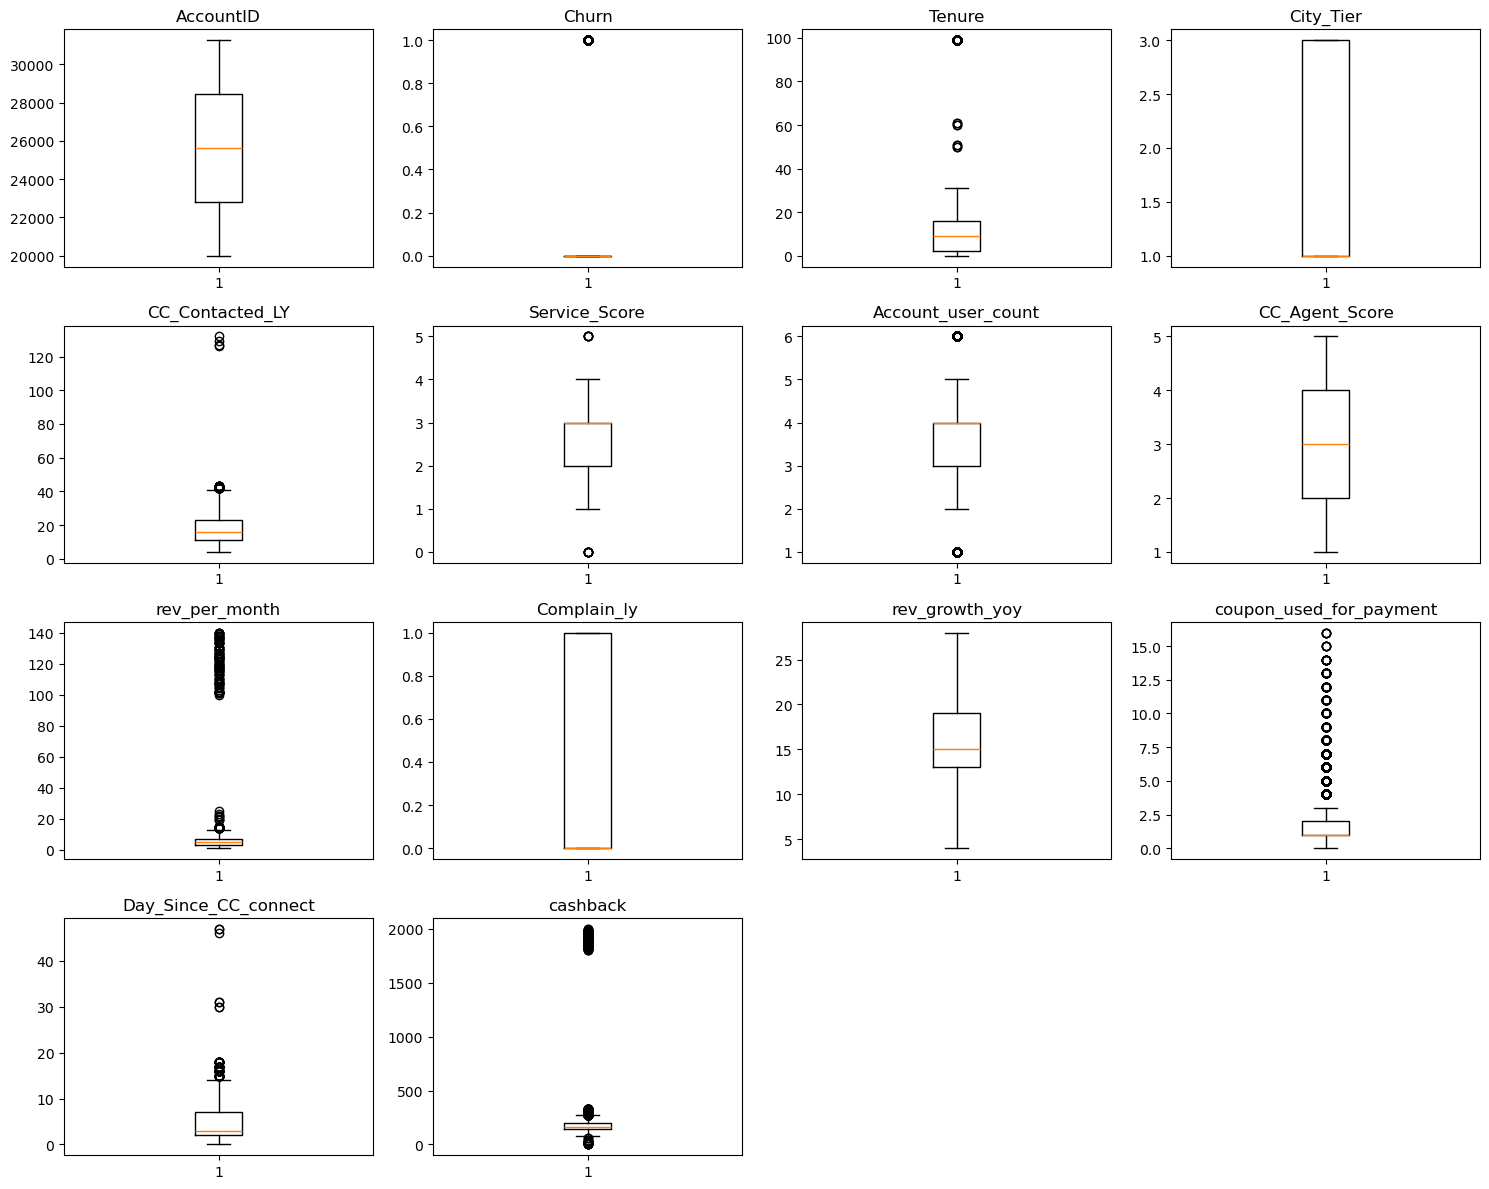

In [46]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [47]:
# treating outliers
def outlier_treatment(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [48]:
# List of columns to apply the outlier treatment
columns_to_process = [
    'Tenure', 'CC_Contacted_LY', 'Account_user_count', 'cashback', 'rev_per_month', 
    'Day_Since_CC_connect', 'coupon_used_for_payment', 'rev_growth_yoy'
]

for col in columns_to_process:
    lw, up = outlier_treatment(df[col])
    df[col] = np.clip(df[col], lw, up)

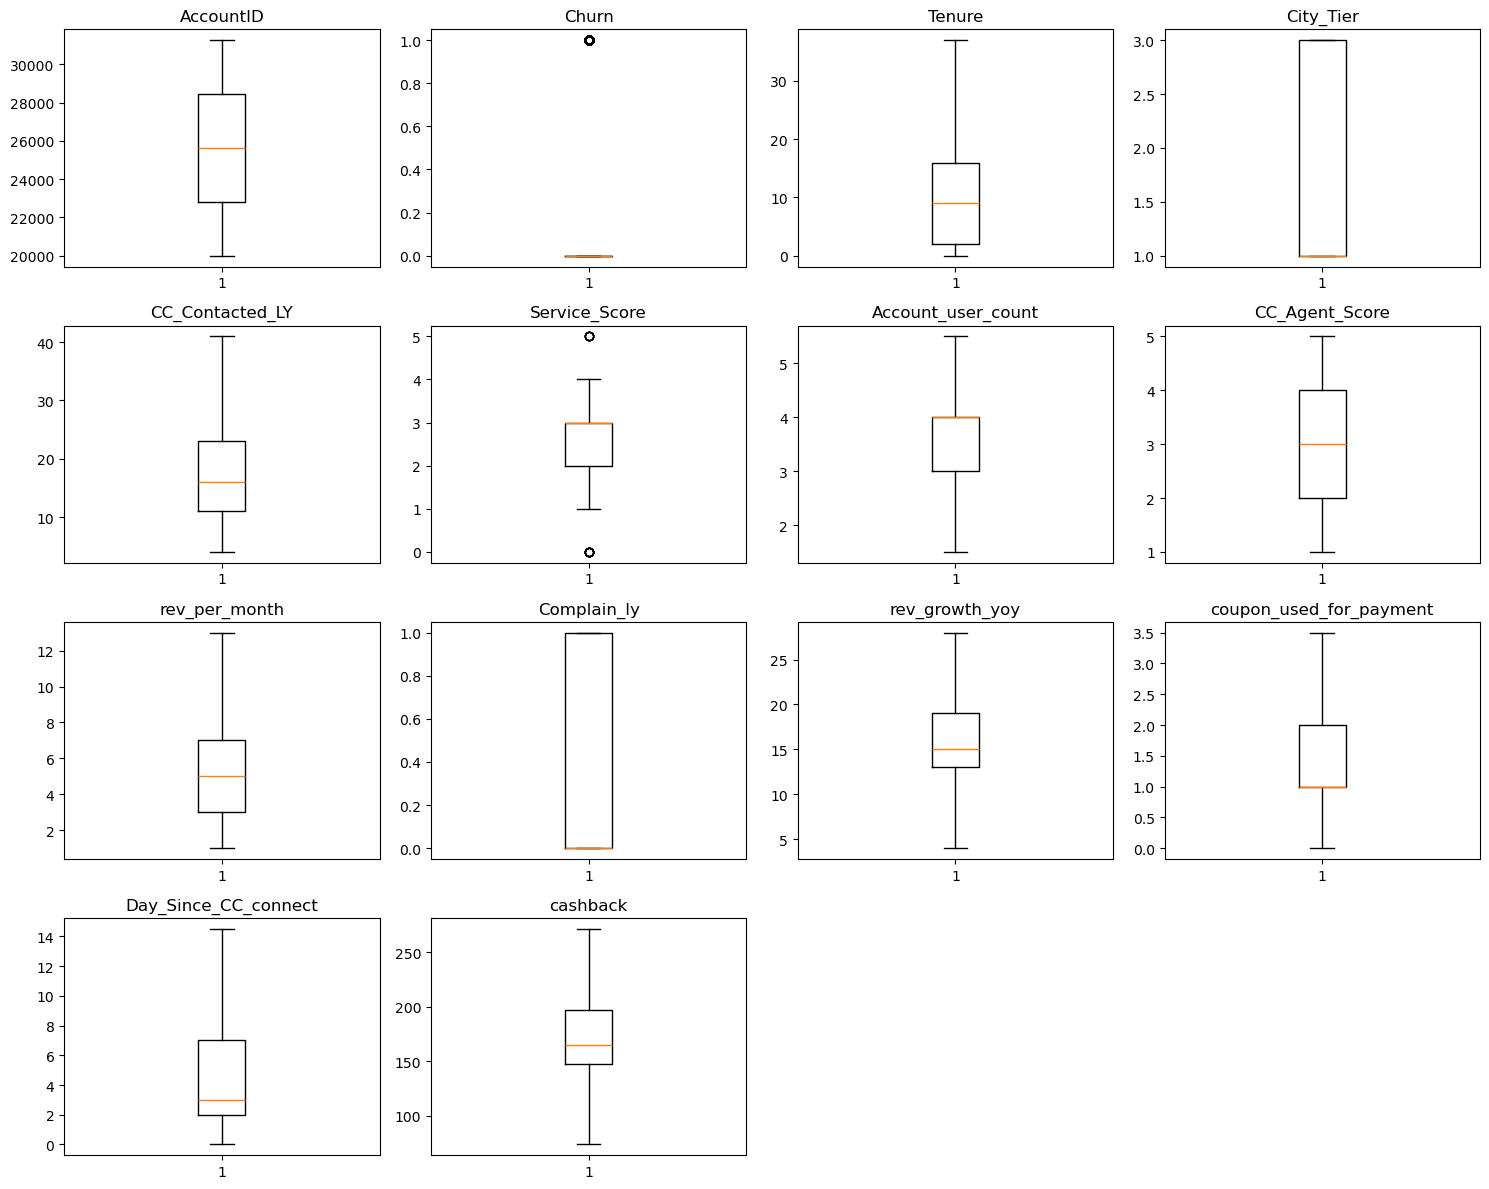

In [49]:
# check outliers post treatment
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## VARIABLE TRANSFORMATION

In [51]:
# encoding payment variable
payment_mapping = {
    'Debit Card': 1,
    'UPI': 2,
    'Credit Card': 3,
    'Cash on Delivery': 4,
    'E wallet': 5
}

df['Payment'] = df['Payment'].replace(payment_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_29112\357238523.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Payment'] = df['Payment'].replace(payment_mapping)


In [52]:
# encoding gender variable
gender_mapping = {
    'Female': 1, 'F': 1,
    'Male': 2, 'M': 2
}

df['Gender'] = df['Gender'].replace(gender_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_29112\3322179126.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(gender_mapping)


In [53]:
# encoding account segment variable
account_segment_mapping = {
    'Super': 1,
    'Regular Plus': 2, 'Regular +': 2,
    'Regular': 3,
    'HNI': 4,
    'Super Plus': 5, 'Super +': 5
}

df['account_segment'] = df['account_segment'].replace(account_segment_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_29112\1112756489.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['account_segment'] = df['account_segment'].replace(account_segment_mapping)


In [73]:
# encoding marital status variable
marital_status_mapping = {
    'Single': 1,
    'Divorced': 2,
    'Married': 3
}

df['Marital_Status'] = df['Marital_Status'].replace(marital_status_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_29112\2153673498.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Marital_Status'] = df['Marital_Status'].replace(marital_status_mapping)


In [93]:
# encoding login device variable
login_device_mapping = {
    'Mobile': 1,
    'Computer': 2
}

df['Login_device'] = df['Login_device'].replace(login_device_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_29112\1616452952.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Login_device'] = df['Login_device'].replace(login_device_mapping)


In [94]:
# List of columns to scale
columns_to_scale = [
    'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment',
    'Gender', 'Service_Score', 'Account_user_count', 'account_segment',
    'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
    'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 
    'cashback', 'Login_device'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to each column in the list
for col in columns_to_scale:
    df[f'Scaled_{col}'] = scaler.fit_transform(df[[col]])

In [95]:
# creating new dataframe with scaled data
scaled_columns = [col for col in df.columns if col.startswith('Scaled_')]
df_scaled = df[scaled_columns]
df_scaled

,Scaled_Churn,Scaled_Tenure,Scaled_City_Tier,Scaled_CC_Contacted_LY,Scaled_Payment,Scaled_Gender,Scaled_Service_Score,Scaled_Account_user_count,Scaled_account_segment,Scaled_CC_Agent_Score,Scaled_Marital_Status,Scaled_rev_per_month,Scaled_Complain_ly,Scaled_rev_growth_yoy,Scaled_coupon_used_for_payment,Scaled_Day_Since_CC_connect,Scaled_cashback,Scaled_Login_device
0,1.0,0.108108,1.0,0.054054,0.00,0.0,0.6,0.375,0.00,0.25,0.0,0.666667,1.0,0.291667,0.285714,0.344828,0.435907,0.0
1,1.0,0.000000,0.0,0.108108,0.25,1.0,0.6,0.625,0.25,0.50,0.0,0.500000,1.0,0.458333,0.000000,0.000000,0.238466,0.0
2,1.0,0.000000,0.0,0.702703,0.00,1.0,0.4,0.625,0.25,0.50,0.0,0.416667,1.0,0.416667,0.000000,0.206897,0.462819,0.0
3,1.0,0.000000,1.0,0.297297,0.00,1.0,0.4,0.625,0.00,1.00,0.0,0.583333,0.0,0.791667,0.000000,0.206897,0.305089,0.0
4,1.0,0.000000,0.0,0.216216,0.50,1.0,0.4,0.375,0.25,1.00,0.0,0.166667,0.0,0.291667,0.285714,0.206897,0.282477,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0.0,0.270270,0.0,0.810811,0.50,1.0,0.6,0.125,0.00,0.00,1.0,0.666667,0.0,0.625000,0.285714,0.275862,0.404442,1.0
11256,0.0,0.351351,0.0,0.405405,0.50,1.0,0.6,0.875,0.75,1.00,1.0,0.500000,0.0,0.500000,0.285714,0.551724,0.774737,0.0
11257,0.0,0.027027,0.0,0.270270,0.00,1.0,0.6,0.125,0.00,0.75,1.0,0.500000,1.0,0.750000,0.285714,0.275862,0.595204,0.0
11258,0.0,0.621622,1.0,0.189189,0.50,1.0,0.8,0.875,0.00,0.75,1.0,0.500000,0.0,0.500000,0.571429,0.620690,0.536928,1.0


In [96]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Scaled_Churn                    11260 non-null  float64
 1   Scaled_Tenure                   11260 non-null  float64
 2   Scaled_City_Tier                11260 non-null  float64
 3   Scaled_CC_Contacted_LY          11260 non-null  float64
 4   Scaled_Payment                  11260 non-null  float64
 5   Scaled_Gender                   11260 non-null  float64
 6   Scaled_Service_Score            11260 non-null  float64
 7   Scaled_Account_user_count       11260 non-null  float64
 8   Scaled_account_segment          11260 non-null  float64
 9   Scaled_CC_Agent_Score           11260 non-null  float64
 10  Scaled_Marital_Status           11260 non-null  float64
 11  Scaled_rev_per_month            11260 non-null  float64
 12  Scaled_Complain_ly              

In [97]:
df['Churn'].value_counts()

Churn
0    9364
1    1896
Name: count, dtype: int64

## MODEL BUILDING

In [99]:
# Create X and Y for modeling
X = df_scaled.drop(['Scaled_Churn'], axis=1) 
y = df_scaled['Scaled_Churn']

In [100]:
# Splitting data into train and test data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [101]:
# Checking the shape of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7882, 17)
X_test (3378, 17)
y_train (7882,)
y_test (3378,)


In [102]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [103]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## LOGISTIC REGRESSION MODEL

In [108]:
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lg_model = LogisticRegression(random_state=1, max_iter=50)
lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=50, random_state=1)

In [109]:
# Make predictions on the test set
y_pred = lg_model.predict(X_test)

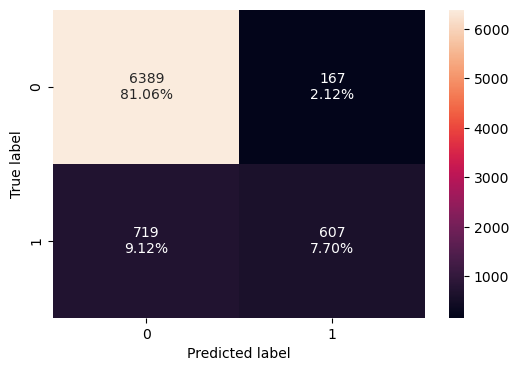

In [110]:
confusion_matrix_statsmodels(lg_model, X_train, y_train)

In [111]:
print("Training performance model 1:")
logistic_reg_perf_train = model_performance_classification_statsmodels(lg_model, X_train, y_train)
logistic_reg_perf_train

Training performance model 1:


,Accuracy,Recall,Precision,F1
0,0.887592,0.457768,0.784238,0.578095


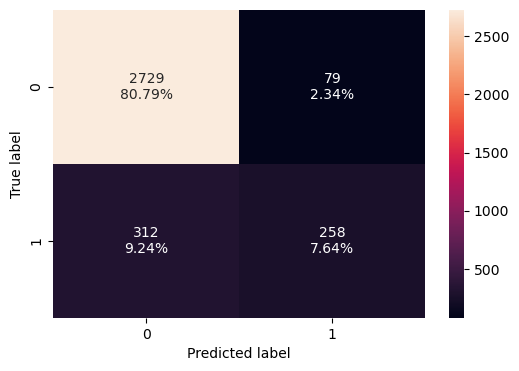

In [112]:
confusion_matrix_statsmodels(lg_model, X_test, y_test)

In [113]:
print("Testing performance model 1:")
logistic_reg_perf_test=model_performance_classification_statsmodels(lg_model, X_test, y_test)
logistic_reg_perf_test

Testing performance model 1:


,Accuracy,Recall,Precision,F1
0,0.884251,0.452632,0.765579,0.568908


## DECISION TREE MODEL

In [115]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [116]:
decision_tree_perf_train = model_performance_classification_statsmodels(
    dt_model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


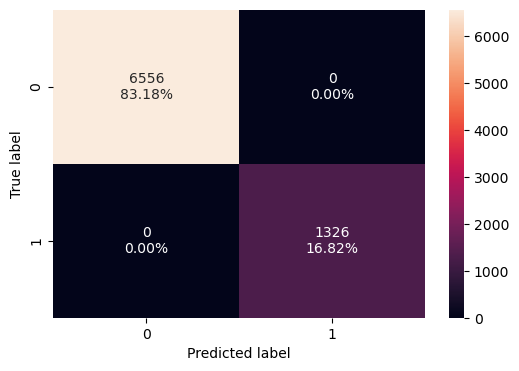

In [117]:
confusion_matrix_statsmodels(dt_model, X_train, y_train)

In [122]:
decision_tree_perf_test = model_performance_classification_statsmodels(
    dt_model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.94701,0.815789,0.862709,0.838593


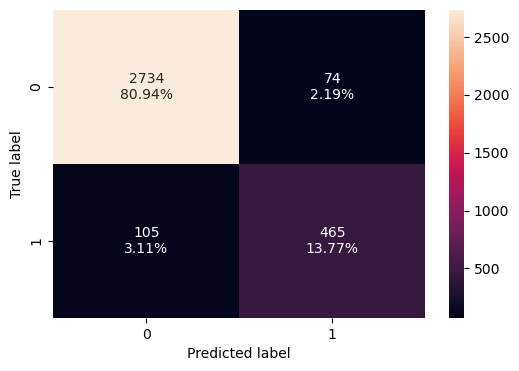

In [123]:
confusion_matrix_statsmodels(dt_model, X_test, y_test)

## LINEAR DISCRIMINANT ANALYSIS MODEL

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model = lda_model.fit(X_train,y_train)

In [134]:
linear_discriminant_perf_train = model_performance_classification_statsmodels(
    lda_model, X_train, y_train
)
linear_discriminant_perf_train

,Accuracy,Recall,Precision,F1
0,0.880868,0.415535,0.770629,0.539931


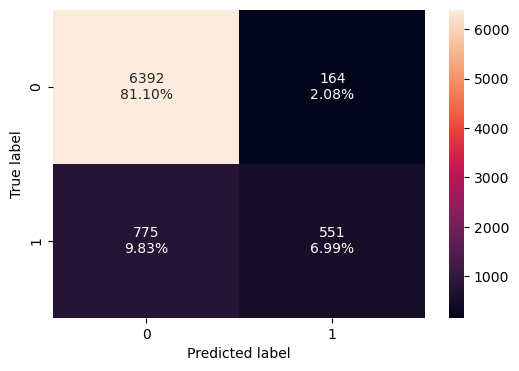

In [138]:
confusion_matrix_statsmodels(lda_model, X_train, y_train)

In [139]:
linear_discriminant_perf_test = model_performance_classification_statsmodels(
    lda_model, X_test, y_test
)
linear_discriminant_perf_test

,Accuracy,Recall,Precision,F1
0,0.87833,0.421053,0.747664,0.538721


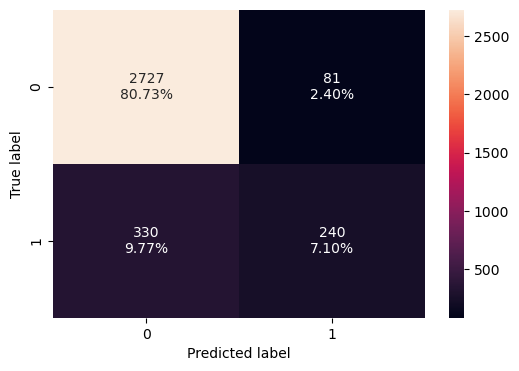

In [142]:
confusion_matrix_statsmodels(lda_model, X_test, y_test)

## ARTIFICAL NEURAL NETWORK

In [150]:
from sklearn.neural_network import MLPClassifier
ann_model = MLPClassifier(random_state=1, max_iter=1000)
ann_model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=1)

In [152]:
artifical_neural_perf_train = model_performance_classification_statsmodels(
    ann_model, X_train, y_train
)
artifical_neural_perf_train

,Accuracy,Recall,Precision,F1
0,0.993149,0.971342,0.98773,0.979468


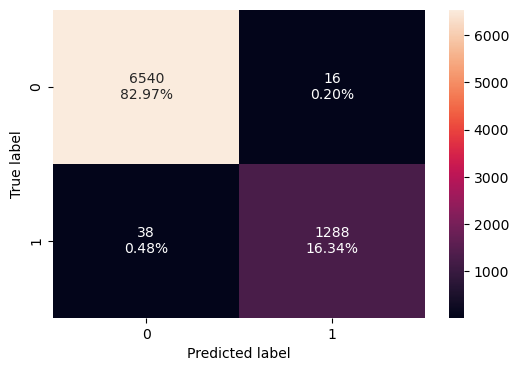

In [154]:
confusion_matrix_statsmodels(ann_model, X_train, y_train)

In [156]:
artifical_neural_perf_test = model_performance_classification_statsmodels(
    ann_model, X_test, y_test
)
artifical_neural_perf_test

,Accuracy,Recall,Precision,F1
0,0.964772,0.884211,0.904847,0.89441


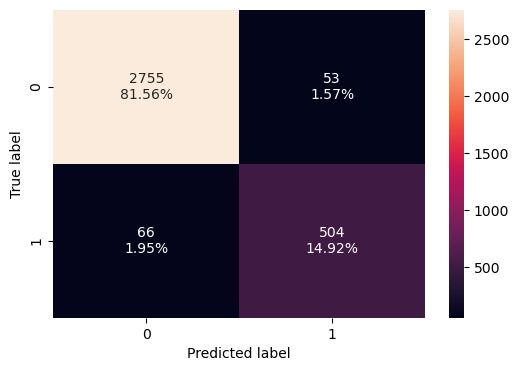

In [159]:
confusion_matrix_statsmodels(ann_model, X_test, y_test)

## SUPPORT VECTOR MACHINE

In [164]:
from sklearn import svm
svm_model = svm.SVC(random_state=1, probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [165]:
support_vector_perf_train = model_performance_classification_statsmodels(
    svm_model, X_train, y_train
)
support_vector_perf_train

,Accuracy,Recall,Precision,F1
0,0.92337,0.604827,0.909297,0.726449


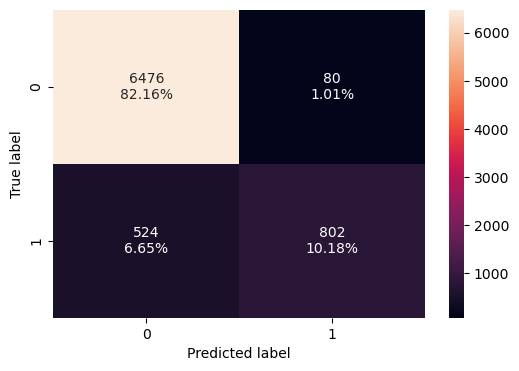

In [166]:
confusion_matrix_statsmodels(svm_model, X_train, y_train)

In [167]:
support_vector_perf_test = model_performance_classification_statsmodels(
    svm_model, X_test, y_test
)
support_vector_perf_test

,Accuracy,Recall,Precision,F1
0,0.915038,0.573684,0.881402,0.695005


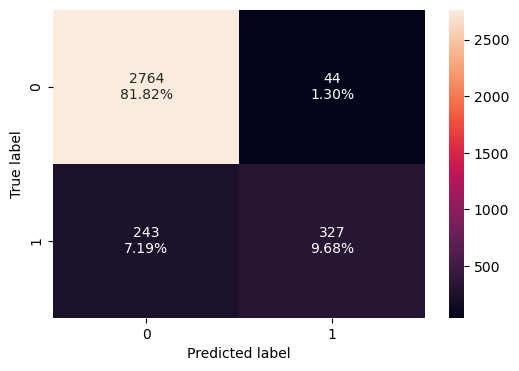

In [168]:
confusion_matrix_statsmodels(svm_model, X_test, y_test)

## K-NEAREST NEIGHBOUR MODEL

In [170]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [173]:
kn_neighbour_perf_train = model_performance_classification_statsmodels(
    knn_model, X_train, y_train
)
kn_neighbour_perf_train

,Accuracy,Recall,Precision,F1
0,0.978432,0.90724,0.9624,0.934006


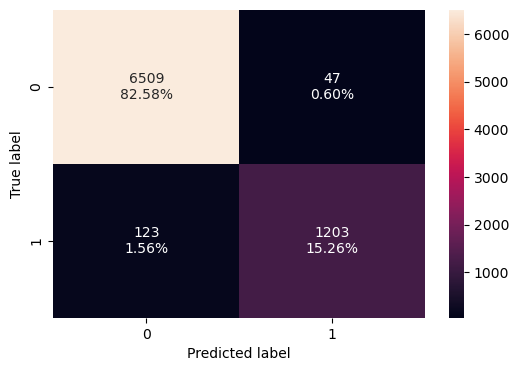

In [172]:
confusion_matrix_statsmodels(knn_model, X_train, y_train)

In [231]:
kn_neighbour_perf_test = model_performance_classification_statsmodels(
    knn_model, X_test, y_test
)
kn_neighbour_perf_test

,Accuracy,Recall,Precision,F1
0,0.954115,0.815789,0.902913,0.857143


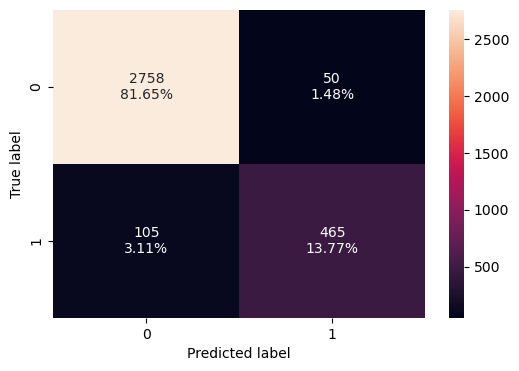

In [180]:
confusion_matrix_statsmodels(knn_model, X_test, y_test)

## ENSEMBLE MODELS

## RANDOM FOREST MODEL

In [197]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [198]:
random_forest_perf_train = model_performance_classification_statsmodels(
    rf_model, X_train, y_train
)
random_forest_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


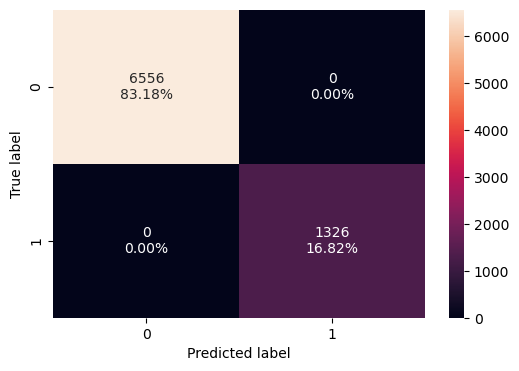

In [201]:
confusion_matrix_statsmodels(rf_model, X_train, y_train)

In [203]:
random_forest_perf_test = model_performance_classification_statsmodels(
    rf_model, X_test, y_test
)
random_forest_perf_test

,Accuracy,Recall,Precision,F1
0,0.972173,0.849123,0.98374,0.911488


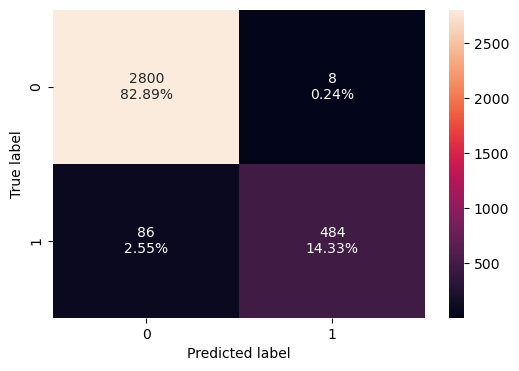

In [205]:
confusion_matrix_statsmodels(rf_model, X_test, y_test)

## GRADIENT BOOSTING MODEL

In [208]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=1)
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [210]:
gradient_boosting_perf_train = model_performance_classification_statsmodels(
    gbm_model, X_train, y_train
)
gradient_boosting_perf_train

,Accuracy,Recall,Precision,F1
0,0.918295,0.637255,0.838294,0.724079


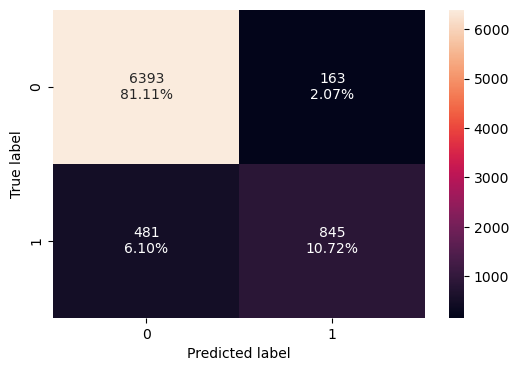

In [212]:
confusion_matrix_statsmodels(gbm_model, X_train, y_train)

In [214]:
gradient_boosting_perf_test = model_performance_classification_statsmodels(
    gbm_model, X_test, y_test
)
gradient_boosting_perf_test

,Accuracy,Recall,Precision,F1
0,0.914446,0.605263,0.843521,0.704801


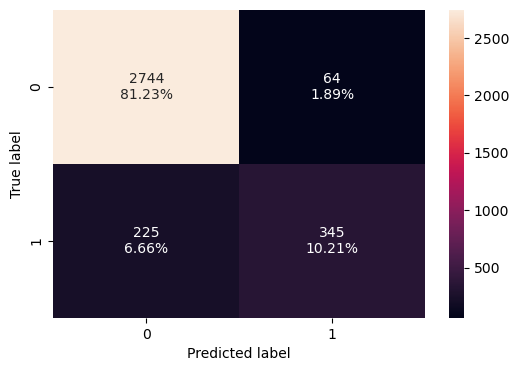

In [216]:
confusion_matrix_statsmodels(gbm_model, X_test, y_test)

## ADABOOSTING MODEL

In [273]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=51, random_state=1)
adamodel = ada_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [275]:
ada_boosting_perf_train = model_performance_classification_statsmodels(
    ada_model, X_train, y_train
)
ada_boosting_perf_train

,Accuracy,Recall,Precision,F1
0,0.89901,0.589744,0.756286,0.662712


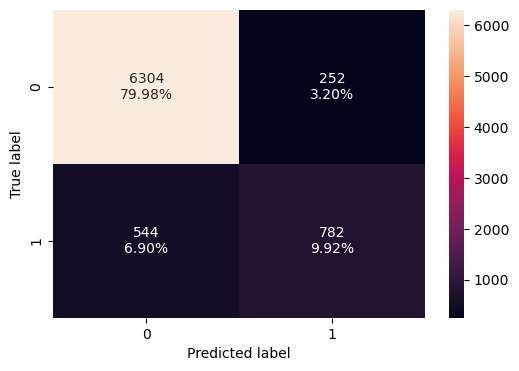

In [277]:
confusion_matrix_statsmodels(ada_model, X_train, y_train)

In [279]:
ada_boosting_perf_test = model_performance_classification_statsmodels(
    ada_model, X_test, y_test
)
ada_boosting_perf_test

,Accuracy,Recall,Precision,F1
0,0.896092,0.57193,0.752887,0.65005


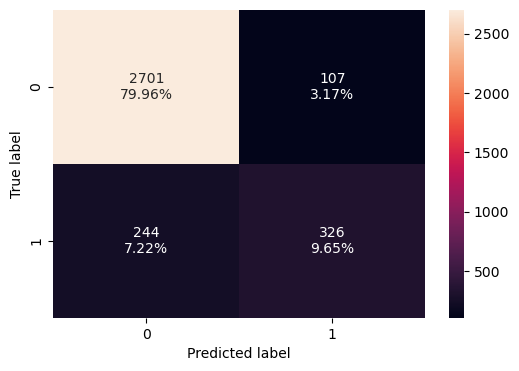

In [281]:
confusion_matrix_statsmodels(ada_model, X_test, y_test)

## MODEL COMPARISON

In [287]:
# training performance comparison

models_train_comp_df = pd.concat(
    [logistic_reg_perf_train.T,
        decision_tree_perf_train.T,
        linear_discriminant_perf_train.T,
        artifical_neural_perf_train.T,
        support_vector_perf_train.T,
        kn_neighbour_perf_train.T,
        random_forest_perf_train.T,
        gradient_boosting_perf_train.T,
        ada_boosting_perf_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = ["Logistic Regression",
    "Decision Tree",
    "Linear Discriminant Analysis",
    "Artifical Neural Network",
    "Support Vector Machine",
    "K-Nearest Neighbors",
    "Random Forest",
    "Gradient Boosting",
    "Adaboosting",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Decision Tree,Linear Discriminant Analysis,Artifical Neural Network,Support Vector Machine,K-Nearest Neighbors,Random Forest,Gradient Boosting,Adaboosting
Accuracy,0.887592,0.947010,0.880868,0.993149,0.923370,0.978432,1.0,0.918295,0.899010
Recall,0.457768,0.815789,0.415535,0.971342,0.604827,0.907240,1.0,0.637255,0.589744
Precision,0.784238,0.862709,0.770629,0.987730,0.909297,0.962400,1.0,0.838294,0.756286
F1,0.578095,0.838593,0.539931,0.979468,0.726449,0.934006,1.0,0.724079,0.662712


In [293]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [logistic_reg_perf_test.T,
        decision_tree_perf_test.T,
        linear_discriminant_perf_test.T,
        artifical_neural_perf_test.T,
        support_vector_perf_test.T,
        kn_neighbour_perf_test.T,
        random_forest_perf_test.T,
        gradient_boosting_perf_test.T,
        ada_boosting_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = ["Logistic Regression",
    "Decision Tree",
    "Linear Discriminant Analysis",
    "Artifical Neural Network",
    "Support Vector Machine",
    "K-Nearest Neighbors",
    "Random Forest",
    "Gradient Boosting",
    "Adaboosting",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Decision Tree,Linear Discriminant Analysis,Artifical Neural Network,Support Vector Machine,K-Nearest Neighbors,Random Forest,Gradient Boosting,Adaboosting
Accuracy,0.884251,0.947010,0.878330,0.964772,0.915038,0.954115,0.972173,0.914446,0.896092
Recall,0.452632,0.815789,0.421053,0.884211,0.573684,0.815789,0.849123,0.605263,0.571930
Precision,0.765579,0.862709,0.747664,0.904847,0.881402,0.902913,0.983740,0.843521,0.752887
F1,0.568908,0.838593,0.538721,0.894410,0.695005,0.857143,0.911488,0.704801,0.650050


## MODEL TUNING

## ANN MODEL TUNING

In [296]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(80,), (90,), (100,), (100, 200, 150)],  # Different hidden layer configurations
    'max_iter': [1000, 2000],  # Maximum number of iterations
    'solver': ['sgd', 'adam', 'lbfgs'],  # Optimization algorithms
    'tol': [0.01, 0.001],  # Tolerance for stopping criterion
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
    'alpha': [0.0001, 0.001, 0.01]  # L2 regularization strength
}
# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=1)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 200, 150), 'max_iter': 1000, 'solver': 'adam', 'tol': 0.001}


In [299]:
tuned_ann_model = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=100, solver='adam', tol=0.001, verbose=True,random_state=1, max_iter=1000)

tuned_ann_model.fit(X_train, y_train)

Iteration 1, loss = 0.49513650
Iteration 2, loss = 0.41877125
Iteration 3, loss = 0.38774006
Iteration 4, loss = 0.36525638
Iteration 5, loss = 0.34897908
Iteration 6, loss = 0.33667138
Iteration 7, loss = 0.32686915
Iteration 8, loss = 0.31915272
Iteration 9, loss = 0.31443610
Iteration 10, loss = 0.30985834
Iteration 11, loss = 0.30606546
Iteration 12, loss = 0.30414238
Iteration 13, loss = 0.30280735
Iteration 14, loss = 0.30170014
Iteration 15, loss = 0.30136930
Iteration 16, loss = 0.30182905
Iteration 17, loss = 0.30016049
Iteration 18, loss = 0.29976214
Iteration 19, loss = 0.29972206
Iteration 20, loss = 0.29970751
Iteration 21, loss = 0.29926376
Iteration 22, loss = 0.29893982
Iteration 23, loss = 0.29916316
Iteration 24, loss = 0.29951442
Iteration 25, loss = 0.29743246
Iteration 26, loss = 0.30041607
Iteration 27, loss = 0.30302706
Iteration 28, loss = 0.29927011
Iteration 29, loss = 0.29754106
Iteration 30, loss = 0.29797446
Iteration 31, loss = 0.29817531
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=100, max_iter=1000,
              random_state=1, tol=0.001, verbose=True)

In [303]:
tuned_ann_perf_train = model_performance_classification_statsmodels(
    tuned_ann_model, X_train, y_train
)
tuned_ann_perf_train

,Accuracy,Recall,Precision,F1
0,0.887465,0.503017,0.745251,0.60063


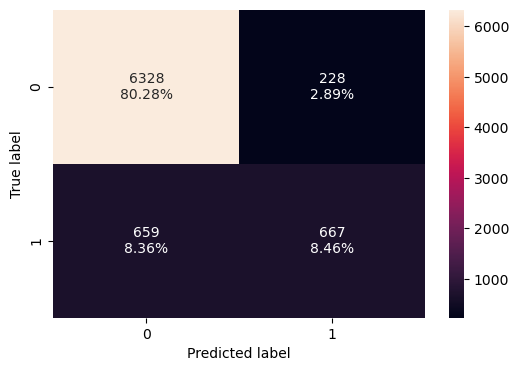

In [305]:
confusion_matrix_statsmodels(tuned_ann_model, X_train, y_train)

In [307]:
tuned_ann_perf_test = model_performance_classification_statsmodels(
    tuned_ann_model, X_test, y_test
)
tuned_ann_perf_test

,Accuracy,Recall,Precision,F1
0,0.886323,0.505263,0.738462,0.6


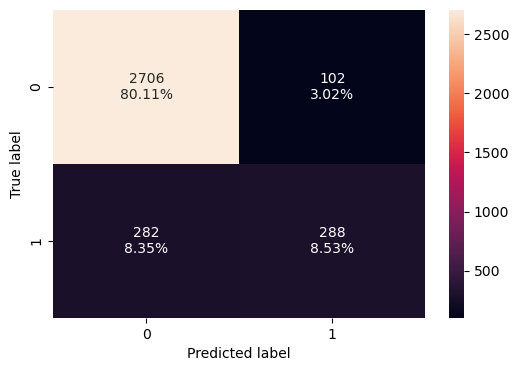

In [311]:
confusion_matrix_statsmodels(tuned_ann_model, X_test, y_test)

## GRADIENT BOOSTING MODEL

In [314]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Controls how much each tree contributes
    'max_depth': [3, 5, 7],  # Depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf node
    'subsample': [0.8, 1.0],  # Fraction of samples used per tree (helps prevent overfitting)
}

# Initialize the Gradient Boosting classifier
gb_model1 = GradientBoostingClassifier(random_state=42)
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_model1, param_grid=param_grid, cv=5, scoring='recall', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)  # Fit the model on training data

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 1.0}


In [326]:
tuned_gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=7,
                        min_samples_leaf=1,
                           min_samples_split=10, n_estimators=200,
                           random_state=1)
tuned_gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, min_samples_split=10, n_estimators=200,
                           random_state=1)

In [327]:
tuned_gbm_perf_train = model_performance_classification_statsmodels(
    tuned_gb_model, X_train, y_train
)
tuned_gbm_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


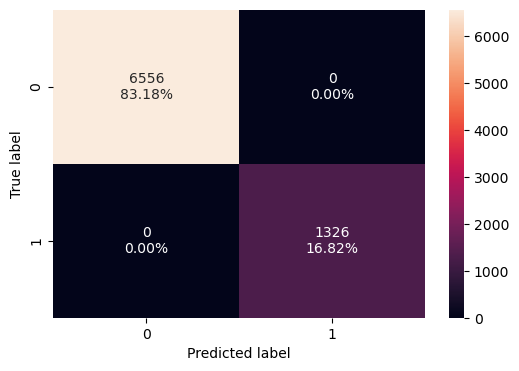

In [334]:
confusion_matrix_statsmodels(tuned_gb_model, X_train, y_train)

In [330]:
tuned_gbm_perf_test = model_performance_classification_statsmodels(
    tuned_gb_model, X_test, y_test
)
tuned_gbm_perf_test

,Accuracy,Recall,Precision,F1
0,0.973949,0.870175,0.972549,0.918519


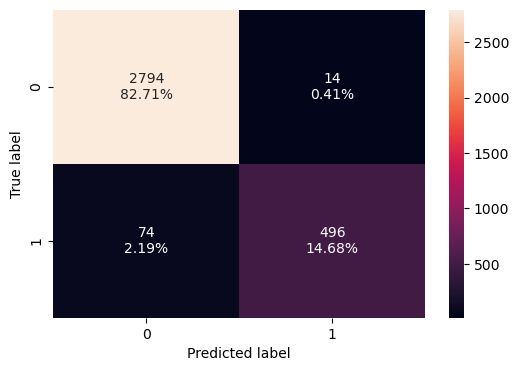

In [338]:
confusion_matrix_statsmodels(tuned_gb_model, X_test, y_test)

## RANDOM FOREST MODEL

In [343]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)  # Fit the model on training data
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [345]:
# Train final model using the best parameters
tuned_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
tuned_rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [347]:
tuned_rf_perf_train = model_performance_classification_statsmodels(
    tuned_rf_model, X_train, y_train
)
tuned_rf_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


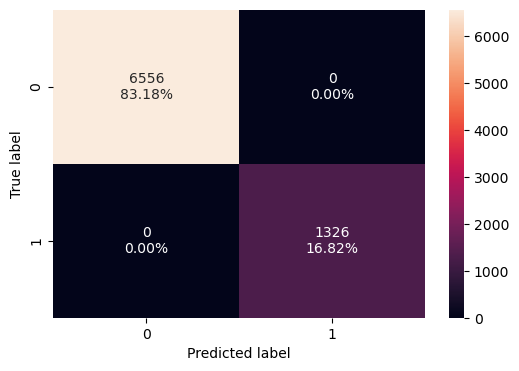

In [349]:
confusion_matrix_statsmodels(tuned_rf_model, X_train, y_train)

In [351]:
tuned_rf_perf_test = model_performance_classification_statsmodels(
    tuned_rf_model, X_test, y_test
)
tuned_rf_perf_test

,Accuracy,Recall,Precision,F1
0,0.980166,0.889474,0.992172,0.93802


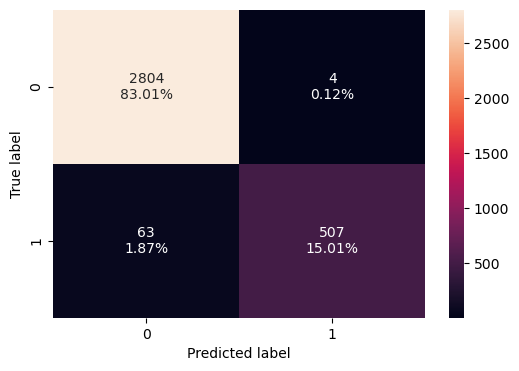

In [353]:
confusion_matrix_statsmodels(tuned_rf_model, X_test, y_test)

## TUNED MODEL COMPARISON

In [370]:
# training performance comparison

models_train_comp_df1 = pd.concat(
    [tuned_ann_perf_train.T,
        tuned_gbm_perf_train.T,
        tuned_rf_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df1.columns = ["Tuned Artificial Neural Network",
    "Tuned Gradient Boosting",
    "Tuned Random Forest"   
]
print("Training performance comparison:")
models_train_comp_df1

Training performance comparison:


,Tuned Artificial Neural Network,Tuned Gradient Boosting,Tuned Random Forest
Accuracy,0.887465,1.0,1.0
Recall,0.503017,1.0,1.0
Precision,0.745251,1.0,1.0
F1,0.600630,1.0,1.0


In [372]:
# testing performance comparison

models_test_comp_df1 = pd.concat(
    [tuned_ann_perf_test.T,
        tuned_gbm_perf_test.T,
        tuned_rf_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df1.columns = ["Tuned Artificial Neural Network",
    "Tuned Gradient Boosting",
    "Tuned Random Forest"   
]
print("Testing performance comparison:")
models_test_comp_df1

Testing performance comparison:


,Tuned Artificial Neural Network,Tuned Gradient Boosting,Tuned Random Forest
Accuracy,0.886323,0.973949,0.980166
Recall,0.505263,0.870175,0.889474
Precision,0.738462,0.972549,0.992172
F1,0.600000,0.918519,0.938020


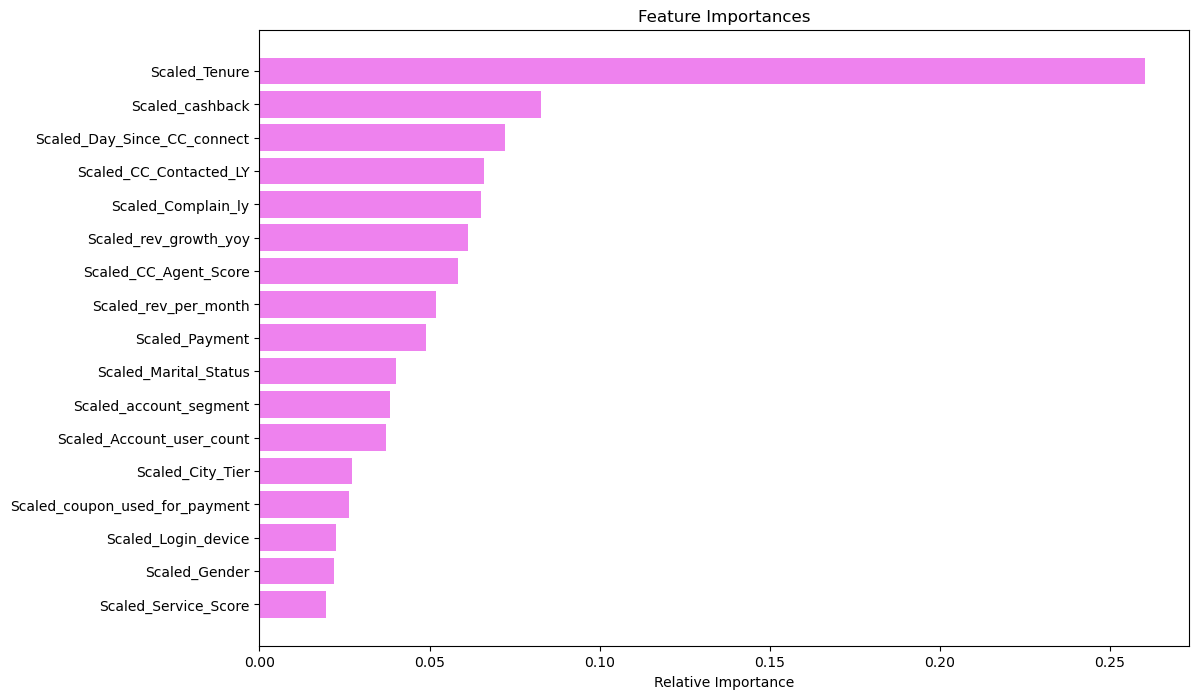

In [376]:
feature_names = X_train.columns
importances = tuned_rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()